<a href="https://colab.research.google.com/github/vnaren13/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

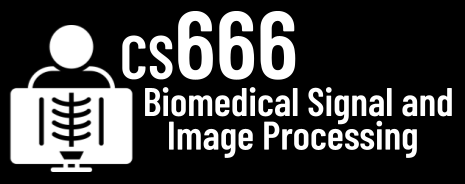

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.1 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
import biosppy
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 15 ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
### TODO
output = biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE,show=False)
rpeaks = output['rpeaks']
biosppy_filtered = output['filtered']

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

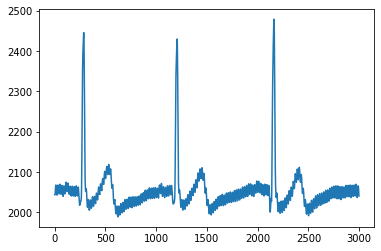

In [ ]:
### TODO plot unfiltered signal

plt.plot(signal[0:3000])

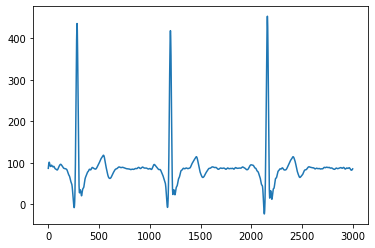

In [ ]:
### TODO plot filtered signal
plt.plot(biosppy_filtered[0:3000])

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

Text(0.5, 0, 'time[s]')

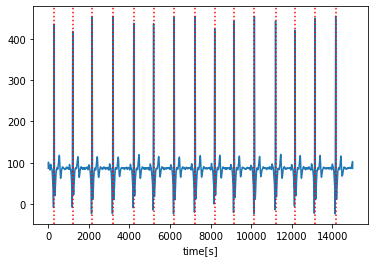

In [ ]:
### TODO

plt.plot(biosppy_filtered)
for rpeak in rpeaks:
    plt.axvline(x=rpeak, color='r', ls=':')
plt.xlabel('time[s]')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method



/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0.5, 1.0, 'ECG signal with P, Q, S, and T waves')

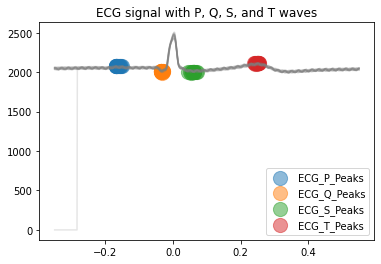

In [ ]:
# TODO Does the detection work well?
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=SAMPLING_RATE,  method="peak", show=True,  show_type='peaks')

plt.title("ECG signal with P, Q, S, and T waves")

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

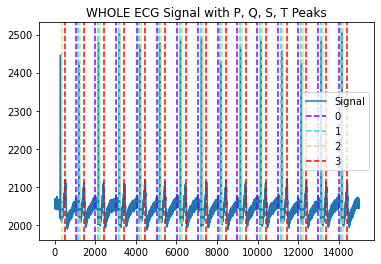

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([waves_peak['ECG_P_Peaks'], 
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], signal)
plt.title("WHOLE ECG Signal with P, Q, S, T Peaks")
plt.show()

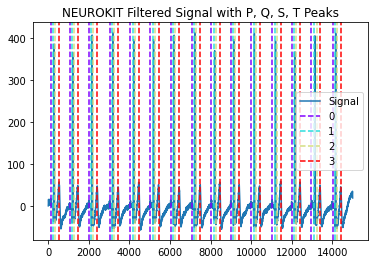

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
neurokit_filtered_signal = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=0.5, highcut=40, method='butterworth', order=2, window_size='default', powerline=50, show=False)
_, waves_peak = nk.ecg_delineate(neurokit_filtered_signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([waves_peak['ECG_P_Peaks'], 
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], neurokit_filtered_signal)
plt.title("NEUROKIT Filtered Signal with P, Q, S, T Peaks ")
plt.show()

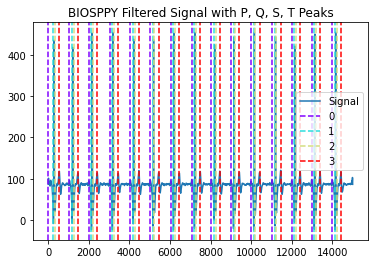

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(biosppy_filtered, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")

plot = nk.events_plot([waves_peak['ECG_P_Peaks'], 
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], biosppy_filtered)
plt.title("BIOSPPY Filtered Signal with P, Q, S, T Peaks")
plt.show()


In [ ]:
# TODO Which one works the best?


From my observation BIOSPPY filtered signal looks accurate compared to the one genrated by NEUROKIT.

References :


1.   https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html



2. https://biosppy.readthedocs.io/en/latest/biosppy.signals.html?highlight=Ecg#biosppy.signals.ecg.ecg

3. https://neuropsychology.github.io/NeuroKit/functions/signal.html?highlight=filter#neurokit2.signal_filter



In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#